In [3]:
 from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
df=pd.read_excel("gdrive/My Drive/Deep leanring/NTL Population Data.xlsx")

In [5]:
df.head()

,Unnamed: 0,STATEFP,COUNTYFP,GEOID,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,DW10,DW11,DW12,DW13,DW14,DW15,DW16,DW17,DW18,DW19,DW20,DW21,DW22,DW23,DW24,DW25,DW26,DW27,DW28,DW29,DW30,...,DW435,DW436,DW437,DW438,DW439,DW440,DW441,DW442,DW443,DW444,DW445,DW446,DW447,DW448,DW449,DW450,DW451,DW452,DW453,DW454,DW455,DW456,DW457,DW458,DW459,DW460,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468,SUMLEV,REGION,DIVISION,STNAME,CTYNAME,medianPopulation
0,1,1,1,1001,161526,0500000US01001,Autauga,6,1539614693,25744269,0.07,0.13,0.15,0.17,0.21,0.28,0.46,0.86,1.90,3.290,7.068500,13.511400,117.099998,-0.08,-0.01,0.01,0.03,0.05,0.110,0.27,0.66,1.60,3.227,6.749000,12.267400,72.900002,0.00,0.06,0.08,0.100,...,0.49,0.62,0.930,1.908000,3.939000,8.519000,16.804800,176.630005,0.40,0.460,0.47,0.49,0.51,0.56,0.67,0.99,1.978,3.799,8.148500,16.437000,156.869995,0.27,0.33,0.3500,0.36,0.38,0.43,0.57,0.90,1.970,3.880,8.607000,17.297400,158.570007,50,3,6,Alabama,Autauga,54864
1,2,1,101,1101,161577,0500000US01101,Montgomery,6,2033764493,37997545,0.02,0.14,0.17,0.20,0.24,0.33,0.64,1.96,13.63,24.676,35.546001,51.141199,117.839996,-0.07,-0.01,0.00,0.03,0.06,0.145,0.49,1.64,12.37,22.019,31.804499,43.114201,119.209999,-0.03,0.07,0.09,0.110,...,0.55,0.85,2.125,16.465999,32.032999,46.874499,63.868401,168.119995,0.38,0.450,0.47,0.49,0.52,0.60,0.91,2.25,15.418,29.618,43.721501,59.038000,167.389999,0.27,0.33,0.3500,0.36,0.39,0.47,0.80,2.32,15.822,29.546,43.797999,59.381201,163.380005,50,3,6,Alabama,Montgomery,227002
2,3,1,103,1103,161578,0500000US01103,Morgan,6,1500602270,50931876,0.13,0.22,0.24,0.27,0.31,0.42,0.67,1.34,4.78,12.809,21.521500,37.254201,85.139999,-0.03,0.05,0.08,0.11,0.16,0.250,0.47,1.08,4.45,12.700,22.276000,35.360799,100.410004,0.06,0.14,0.17,0.191,...,0.71,0.96,1.660,5.880000,16.142000,28.653500,47.147200,358.079987,0.48,0.550,0.58,0.61,0.66,0.78,1.03,1.74,5.746,15.399,26.700001,44.591399,145.720001,0.31,0.41,0.4455,0.47,0.51,0.62,0.86,1.51,5.228,14.610,26.245000,45.651401,1154.489990,50,3,6,Alabama,Morgan,119199
3,4,1,105,1105,161579,0500000US01105,Perry,6,1863885725,10952676,-0.04,0.04,0.05,0.07,0.09,0.12,0.17,0.26,0.45,0.670,1.035000,2.764000,18.780001,-0.14,-0.10,-0.09,-0.08,-0.06,-0.040,0.00,0.07,0.22,0.410,0.770000,2.502000,15.540000,-0.09,-0.04,-0.02,-0.010,...,0.41,0.44,0.510,0.710000,0.920000,1.380000,3.914000,26.750000,0.33,0.398,0.41,0.42,0.43,0.46,0.49,0.56,0.750,0.970,1.365000,3.724000,26.150000,0.20,0.26,0.2800,0.29,0.30,0.32,0.36,0.42,0.590,0.790,1.115000,3.346000,21.620001,50,3,6,Alabama,Perry,9653
4,5,1,107,1107,161580,0500000US01107,Pickens,6,2282893859,22521211,-0.01,0.08,0.09,0.11,0.13,0.17,0.23,0.35,0.65,1.020,1.745500,4.494600,91.410004,-0.17,-0.08,-0.07,-0.05,-0.04,0.000,0.05,0.16,0.42,0.720,1.330000,3.456400,46.150002,-0.13,-0.04,-0.01,0.010,...,0.44,0.50,0.640,0.940000,1.300000,1.930000,5.476400,151.630005,0.36,0.410,0.43,0.44,0.46,0.49,0.54,0.68,0.970,1.320,1.995500,4.903800,161.589996,0.23,0.28,0.3000,0.31,0.33,0.36,0.41,0.54,0.810,1.130,1.695500,4.340000,127.980003,50,3,6,Alabama,Pickens,20282


In [6]:
df.describe()

,Unnamed: 0,STATEFP,COUNTYFP,GEOID,COUNTYNS,LSAD,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,DW10,DW11,DW12,DW13,DW14,DW15,DW16,DW17,DW18,DW19,DW20,DW21,DW22,DW23,DW24,DW25,DW26,DW27,DW28,DW29,DW30,DW31,DW32,...,DW433,DW434,DW435,DW436,DW437,DW438,DW439,DW440,DW441,DW442,DW443,DW444,DW445,DW446,DW447,DW448,DW449,DW450,DW451,DW452,DW453,DW454,DW455,DW456,DW457,DW458,DW459,DW460,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468,SUMLEV,REGION,DIVISION,medianPopulation
count,3142.000000,3142.000000,3142.000000,3142.000000,3.142000e+03,3142.000000,3.142000e+03,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.0,3142.000000,3142.000000,3.142000e+03
mean,1571.500000,30.280076,103.572884,30383.649268,9.419963e+05,6.409930,2.911730e+09,2.285070e+08,-0.013094,0.107567,0.149680,0.196348,0.273586,0.482353,0.876884,1.753195,3.583018,5.686018,8.666703,14.192281,56.495703,-0.059577,0.054313,0.094481,0.138717,0.206489,0.389004,0.750024,1.541501,3.228509,5.188238,7.934804,12.973690,50.356801,0.022069,0.134730,0.178604,0.228095,0.313056,0.527206,...,0.535097,0.621194,0.868543,1.372207,2.522350,5.038748,8.117667,12.765667,21.651070,182.844261,0.400971,0.493613,0.533964,0.583635,0.670776,0.916574,1.415641,2.569052,5.128514,8.261595,12.949921,22.094665,176.434519,0.278374,0.361510,0.396940,0.441536,0.514320,0.719057,1.134975,2.088413,4.163359,6.667352,10.402956,17.723412,142.333447,50.0,2.668682,5.192553,1.021772e+05
std,907.161599,15.144339,107.704060,15162.508374,5.063090e+05,2.481258,9.360574e+09,1.384840e+09,0.475120,0.641035,0.796943,1.000915,1.393010,2.433732,3.969717,6.368354,9.995402,12.978859,16.350575,21.069002,66.337244,0.399395,0.548808,0.687276,0.878039,1.235699,2.145951,3.568931,5.746788,9.195599,12.193628,15.504945,20.466017,64.494747,0.436010,0.629361,0.812546,1.009855,1.453397,2.456845,...,1.102594,1.563172,2.834359,4.829679,7.961402,12.926972,17.396819,23.338338,31.194439,845.137985,0.550568,0.771602,0.947449,1.171382,1.654863,2.933670,4.944057,8.165396,13.202510,17.563265,22.861170,30.998378,642.621668,0.524448,0.710531,0.838194,1.072735,1.474758,2.529689,4.218361,6.910944,11.155049,14.819041,19.219693,26.259067,537.867369,0.0,0.803149,1.964060,3.287355e+05
min,1.000000,1.000000,1.000000,1001.000000,2.390100e+04,0.000000,5.300264e+06,0.000000e+00,-1.500000,-0.590000,-0.520000,-0.460000,-0.380000,-0.250000,-0.110000,-0.050000,-0.020000,0.000000,0.000000,0.000000,0.000000,-0.930000,-0.360000,-0.310000,-0.260000,-0.200000,-0.100000,-0.060000,-0.040000,-0.020000,-0.010000,0.000000,0.000000,0.000000,-0.770000,-0.260000,-0.210000,-0.180000,-0.160000,-0.130000,...,0.000000,0.100000,0.130000,0.160000,0.210000,0.270000,0.300000,0.350000,0.370000,0.720000,-0.150000,0.000000,0.000000,0.190000,0.220000,0.250000,0.280000,0.320000,0.340000,0.350000,0.370000,0.390000,0.940000,-0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,1.000000,1.000000,8.800000e+01
25%,786.250000,18.000000,35.000000,18177.500000,4.849692e+05,6.000000,1.115845e+09,7.143815e+06,-0.130000,-0.040000,-0.020000,0.000000,0.000000,0.030000,0.080000,0.130000,0.250000,0.420000,0.810000,2.070000,21.882500,-0.150000,-0.060000,-0.04000

In [7]:
##Checking for missing values
df.isna().any()

Unnamed: 0          False
STATEFP             False
COUNTYFP            False
GEOID               False
COUNTYNS            False
AFFGEOID            False
NAME                False
LSAD                False
ALAND               False
AWATER              False
DW1                 False
DW2                 False
DW3                 False
DW4                 False
DW5                 False
DW6                 False
DW7                 False
DW8                 False
DW9                 False
DW10                False
DW11                False
DW12                False
DW13                False
DW14                False
DW15                False
DW16                False
DW17                False
DW18                False
DW19                False
DW20                False
                    ...  
DW445               False
DW446               False
DW447               False
DW448               False
DW449               False
DW450               False
DW451               False
DW452       

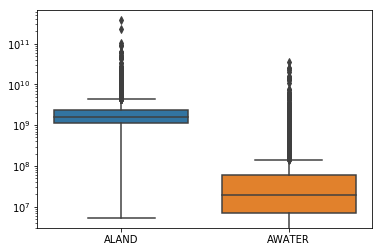

In [8]:
##Checking for outliers in Aland and Awater
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
boxplot = sns.boxplot(data = df.iloc[:,8:10],orient = "v")
boxplot.set_yscale('log')

In [0]:
##Set the random 
import random
random.seed(123)

In [0]:
##Checking for outliers
df_num = df._get_numeric_data()
Q1 = df_num.quantile(0.15)
Q3 = df_num.quantile(0.85)
IQR = Q3 - Q1

In [0]:
##Splitting the dataset into 10 equal parts
df['quantile'] = pd.qcut(df['medianPopulation'], 10, labels=False)

In [0]:
import sklearn.utils
from sklearn.utils import shuffle
df = shuffle(df)

In [13]:
##Normalization using Min max scaler
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
##storing numeric variables in a new dataframe
df_new = df.iloc[:,8:478]
df_new.head()

,ALAND,AWATER,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,DW10,DW11,DW12,DW13,DW14,DW15,DW16,DW17,DW18,DW19,DW20,DW21,DW22,DW23,DW24,DW25,DW26,DW27,DW28,DW29,DW30,DW31,DW32,DW33,DW34,DW35,DW36,DW37,DW38,...,DW429,DW430,DW431,DW432,DW433,DW434,DW435,DW436,DW437,DW438,DW439,DW440,DW441,DW442,DW443,DW444,DW445,DW446,DW447,DW448,DW449,DW450,DW451,DW452,DW453,DW454,DW455,DW456,DW457,DW458,DW459,DW460,DW461,DW462,DW463,DW464,DW465,DW466,DW467,DW468
1881,1052469899,1694037,0.08,0.16,0.19,0.21,0.23,0.28,0.35,0.51,1.04,2.260,6.7290,13.2292,52.76,0.08,0.14,0.16,0.18,0.20,0.24,0.33,0.48,0.93,2.4715,7.5315,13.9961,38.37,0.14,0.22,0.25,0.27,0.29,0.35,0.43,0.63,1.16,3.0815,8.38725,16.2476,...,59.91,0.40,0.470,0.50,0.52,0.55,0.60,0.75,1.06,1.85,4.9545,15.6505,32.1353,103.09,0.45,0.50,0.52,0.54,0.57,0.61,0.68,0.83,1.39,4.279,14.16475,30.6468,92.61,0.31,0.350,0.37,0.38,0.40,0.45,0.52,0.67,1.19,2.9815,9.11150,19.0837,95.92
1457,1745910545,27167485,-0.06,0.01,0.03,0.04,0.06,0.09,0.14,0.24,0.63,2.111,6.0455,18.2778,115.17,-0.29,-0.03,0.00,0.00,0.00,0.14,0.19,0.29,0.58,1.6310,6.0395,20.0400,136.94,0.01,0.06,0.07,0.08,0.10,0.13,0.17,0.27,0.58,2.0800,5.80100,18.9842,...,0.00,0.28,0.340,0.35,0.37,0.38,0.42,0.47,0.58,1.01,3.1010,9.7755,29.7078,264.84,0.36,0.42,0.44,0.45,0.47,0.50,0.55,0.82,1.87,5.062,16.19900,51.4364,296.24,0.20,0.250,0.27,0.28,0.30,0.33,0.38,0.47,0.84,2.4200,7.83500,24.8862,196.97
2924,2153665639,45713371,-0.17,-0.08,-0.05,-0.02,0.00,0.07,0.16,0.32,0.78,1.880,6.5800,14.5000,53.85,-0.13,0.00,0.00,0.00,0.00,0.00,0.24,0.40,0.83,2.0050,6.0925,14.9120,60.38,0.00,0.13,0.16,0.18,0.21,0.25,0.31,0.44,0.94,3.1450,8.81750,17.6430,...,0.00,0.25,0.319,0.33,0.35,0.37,0.41,0.48,0.73,1.65,5.0700,13.5825,27.0310,91.28,0.31,0.37,0.39,0.40,0.42,0.46,0.56,0.96,2.35,7.810,19.56750,39.3530,142.67,0.20,0.259,0.27,0.28,0.30,0.34,0.40,0.54,1.01,2.8400,7.91500,17.6750,74.71
2441,2830586532,1345801461,-0.04,0.06,0.07,0.09,0.11,0.15,0.21,0.33,0.64,1.390,3.3400,8.6531,194.74,-0.11,-0.06,-0.05,-0.03,-0.01,0.05,0.12,0.28,0.67,1.4900,3.3055,11.1286,217.82,-0.18,-0.07,-0.04,-0.02,0.00,0.05,0.12,0.26,0.55,1.2000,2.95000,10.1955,...,270.47,0.25,0.320,0.34,0.36,0.38,0.42,0.50,0.64,1.07,2.0300,4.4710,15.8200,327.86,0.30,0.37,0.38,0.40,0.42,0.47,0.54,0.67,1.13,2.260,5.69825,18.8355,378.87,0.22,0.270,0.29,0.31,0.34,0.38,0.46,0.63,1.03,1.8700,3.90275,12.7986,402.04
1173,1444886580,64851262,-0.11,-0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.0000,0.0000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000,0.0000,0.0000,0.00,-0.03,0.05,0.08,0.10,0.12,0.16,0.21,0.28,0.42,0.5900,1.00000,2.5100,...,0.00,0.22,0.270,0.28,0.30,0.31,0.34,0.37,0.41,0.55,0.8300,1.4200,3.3508,83.18,0.33,0.40,0.42,0.44,0.47,0.51,0.56,0.63,0.76,1.020,1.61950,4.2672,116.63,0.14,0.220,0.23,0.25,0.26,0.29,0.33,0.37,0.43,0.5000,0.68000,1.4618,41.45


In [0]:
##Assigning all negative values to zero
df_new[df_new<0] = 0
  

In [0]:
##fit the data to scale:
scaler.fit(df_new)
df_scaled = scaler.transform(df_new)

In [16]:
df_scaled

array([[2.77744895e-03, 4.78673064e-05, 7.43494424e-03, ...,
        3.21924729e-02, 5.14267898e-02, 4.91954957e-03],
       [4.61668868e-03, 7.67654029e-04, 0.00000000e+00, ...,
        2.76823821e-02, 6.70633774e-02, 1.01022068e-02],
       [5.69819346e-03, 1.29169312e-03, 0.00000000e+00, ...,
        2.79650357e-02, 4.76306224e-02, 3.83173007e-03],
       ...,
       [4.54456319e-03, 8.10486223e-04, 0.00000000e+00, ...,
        1.34260437e-03, 1.85025094e-03, 4.11843026e-04],
       [6.91798226e-03, 3.60369029e-02, 0.00000000e+00, ...,
        4.41646173e-03, 1.13763754e-02, 1.88637441e-03],
       [8.56686693e-05, 7.84153337e-06, 1.07806691e-01, ...,
        1.88803739e-01, 1.53648977e-01, 3.59170200e-03]])

In [0]:
##PCA
from sklearn.decomposition import PCA

In [0]:
pca = PCA()

In [0]:
df_pca = pca.fit_transform(df_scaled)

In [20]:
pca.explained_variance_ratio_

array([6.51675317e-01, 1.50164984e-01, 5.46553730e-02, 2.39527664e-02,
       2.14258451e-02, 1.41069905e-02, 1.00090009e-02, 8.11943353e-03,
       7.54824905e-03, 5.45492188e-03, 4.76819374e-03, 4.32302990e-03,
       3.40401370e-03, 3.02218597e-03, 2.40026193e-03, 2.01671186e-03,
       1.75774028e-03, 1.68970244e-03, 1.40254940e-03, 1.37910101e-03,
       1.32153730e-03, 1.25836808e-03, 1.12242038e-03, 1.04694522e-03,
       9.79154194e-04, 9.40445322e-04, 9.12183249e-04, 8.51091809e-04,
       7.85150242e-04, 7.71835168e-04, 7.25407383e-04, 6.55655915e-04,
       6.24157792e-04, 6.01106839e-04, 5.52393337e-04, 5.00380573e-04,
       4.92992463e-04, 4.67084511e-04, 4.41030437e-04, 4.37047873e-04,
       3.68314790e-04, 3.64481908e-04, 3.55142021e-04, 3.50585276e-04,
       3.38743980e-04, 3.34746722e-04, 3.15942070e-04, 3.06080385e-04,
       2.94489223e-04, 2.78113465e-04, 2.55964718e-04, 2.54148395e-04,
       2.48291514e-04, 2.31505087e-04, 2.23420122e-04, 2.14795964e-04,
      

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Principalcomponents')

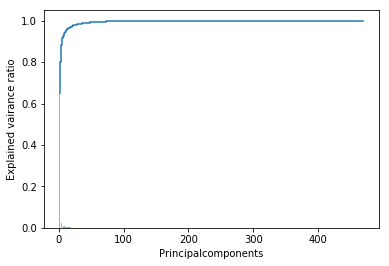

In [22]:
plt.bar(range(1,471),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.step(range(1,471),np.cumsum(pca.explained_variance_ratio_),where = 'mid')
plt.ylabel('Explained vairance ratio')
plt.xlabel('Principalcomponents')
#plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [23]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0      0.651675
1      0.801840
2      0.856496
3      0.880448
4      0.901874
5      0.915981
6      0.925990
7      0.934110
8      0.941658
9      0.947113
10     0.951881
11     0.956204
12     0.959608
13     0.962630
14     0.965031
15     0.967047
16     0.968805
17     0.970495
18     0.971897
19     0.973276
20     0.974598
21     0.975856
22     0.976979
23     0.978026
24     0.979005
25     0.979945
26     0.980857
27     0.981709
28     0.982494
29     0.983266
         ...   
440    1.000000
441    1.000000
442    1.000000
443    1.000000
444    1.000000
445    1.000000
446    1.000000
447    1.000000
448    1.000000
449    1.000000
450    1.000000
451    1.000000
452    1.000000
453    1.000000
454    1.000000
455    1.000000
456    1.000000
457    1.000000
458    1.000000
459    1.000000
460    1.000000
461    1.000000
462    1.000000
463    1.000000
464    1.000000
465    1.000000
466    1.000000
467    1.000000
468    1.000000
469    1.000000
Length: 470, dtype: floa

In [24]:
##By analyzing the PCA components from the previous step we have choosen pca components as 12
from pandas import DataFrame
DataFrame(pca.explained_variance_ratio_.round(3)[:12], index=["P" + str(i) for i in range(1,13)], columns=["Explained Variance"]).T

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
Explained Variance,0.652,0.15,0.055,0.024,0.021,0.014,0.01,0.008,0.008,0.005,0.005,0.004


In [0]:
##We are finalizing the pca count as 5
pca = PCA(n_components=5)

In [0]:
##Transforming 
df_pca_final = pca.fit_transform(df_pca)

In [27]:
df_pca_final.shape

(3142, 5)

In [28]:
##the transformed PCA
df_pca_final

array([[-1.26940261e-01,  1.21280301e-01, -5.60375076e-02,
        -9.59769939e-03,  5.85992396e-02],
       [-1.58920081e-01,  5.86347748e-02, -1.42458375e-01,
        -4.66219025e-02,  1.06098944e-01],
       [-1.61572915e-01,  8.35553741e-02, -1.24965591e-01,
        -2.94045110e-02,  2.56353230e-02],
       ...,
       [-4.06304098e-01,  1.53196148e-01,  6.06210515e-02,
        -3.46652451e-03, -9.25486191e-02],
       [-3.46194294e-01,  1.25386077e-01, -2.29048895e-03,
        -1.14052790e-02, -5.79478401e-02],
       [ 2.96932880e+00,  4.95697772e-01,  6.00830881e-01,
         1.00390763e+00, -2.61710743e-01]])

In [29]:
##Creating the dataframe 'z' for future analysis of the countys and state
z = pd.DataFrame()
z['quantile'] = df['quantile']
z['county'] = df['CTYNAME']
z.shape

(3142, 2)

In [0]:
##train and test spliting
X = df_pca_final
y = df['medianPopulation']


In [31]:
##Z_train and Z_test contains county's and quantiles information
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.2,random_state=123)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
y_test.shape


(2513, 5) (2513,)
(629, 5) (629,)


(629,)

In [32]:
##To create a baseline model we are using Dummy regressor:This will be useful as a simple baseline to compare with other (real) regressors
from sklearn.dummy import DummyRegressor
##Creating Dummy Regression Always Predicts The Mean Value Of Target
dummy_mean = DummyRegressor(strategy='mean')
dummy_mean.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [33]:
dummy_mean.score(X_test, y_test) 

-0.00010770369518664503

In [34]:
##Building Linear Model with out cross validation
from sklearn import linear_model
#from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import metrics
Linear_model = linear_model.LinearRegression()
Linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
from sklearn.metrics import r2_score
y_pred_linear = Linear_model.predict(X_test)
y_pred_linear_train = Linear_model.predict(X_train)
print('Mean Absolute Error for test:', metrics.mean_absolute_error(y_test, y_pred_linear)) 
print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train, y_pred_linear_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))
print('Variance score of linear Regression:', r2_score(y_test, y_pred_linear))

Mean Absolute Error for test: 64867.901984725664
Mean Absolute Error for train: 65259.63755776238
Mean Squared Error: 43844300327.11907
Root Mean Squared Error: 209390.30619185566
Variance score of linear Regression: 0.48828008721811


In [0]:
##Random forest without cross validation
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(random_state = 123, min_samples_leaf=8, n_estimators=50)
rf.fit(X_train, y_train,)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [38]:
from sklearn.metrics import r2_score
y_pred_rf = rf.predict(X_test)
errors = abs(y_pred_rf - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Variance score of random forest Regression:', r2_score(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 56284.72
Variance score of random forest Regression: 0.4961489592432474
Mean Squared Error: 43170093246.862564
Root Mean Squared Error: 207774.13998585715


In [39]:
##Neural Network 
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.core import Dropout


Using TensorFlow backend.


In [40]:
NN_model = Sequential()
# The Input Layer :
NN_model.add(Dense(256, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
##
NN_model.add(Dropout(0.1))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(16, kernel_initializer='normal',activation='relu'))
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      


In [41]:
NN_model.fit(X_train, y_train, epochs=50, batch_size=32)



Epoch 1/50
2513/2513 [==============================] - 5s 2ms/step - loss: 102654.0020 - mean_absolute_error: 102654.0020
Epoch 2/50
2513/2513 [==============================] - 1s 209us/step - loss: 92065.9500 - mean_absolute_error: 92065.9500
Epoch 3/50
2513/2513 [==============================] - 0s 186us/step - loss: 68923.2218 - mean_absolute_error: 68923.2218
Epoch 4/50
2513/2513 [==============================] - 0s 171us/step - loss: 61125.2969 - mean_absolute_error: 61125.2969
Epoch 5/50
2513/2513 [==============================] - 0s 177us/step - loss: 59559.2808 - mean_absolute_error: 59559.2808
Epoch 6/50
2513/2513 [==============================] - 0s 185us/step - loss: 58731.7084 - mean_absolute_error: 58731.7084
Epoch 7/50
2513/2513 [==============================] - 0s 184us/step - loss: 58221.9569 - mean_absolute_error: 58221.9569
Epoch 8/50
2513/2513 [==============================] - 1s 212us/step - loss: 57814.8166 - mean_absolute_error: 57814.8166
Epoch 9/50
2513

In [42]:
##K-fold validation
kfold_dataset = pd.DataFrame(X_train)
kfold_dataset['medianPopulation'] = y_train
kfold_dataset.shape

(2513, 6)

In [0]:
y_train1 = pd.DataFrame(y_train)

In [0]:
y_train1 = y_train1.reset_index(drop=True)

In [0]:
kfold_dataset['medianPopulation'] = y_train1

In [0]:
kfold_dataset = kfold_dataset.reset_index(drop=True)

In [47]:
kfold_dataset.isnull().sum()

0                   0
1                   0
2                   0
3                   0
4                   0
medianPopulation    0
dtype: int64

In [48]:
def k_fold_split(dataset, folds=3):
   
    df_split = np.array_split(dataset, folds)
    return df_split
np.random.seed(123)
folds = k_fold_split(kfold_dataset, 10)
for i in range(len(folds)):
    print("fold {}'s length is {}  ".format(i,len(folds[i])))

fold 0's length is 252  
fold 1's length is 252  
fold 2's length is 252  
fold 3's length is 251  
fold 4's length is 251  
fold 5's length is 251  
fold 6's length is 251  
fold 7's length is 251  
fold 8's length is 251  
fold 9's length is 251  


In [49]:
kfold_dataset.head()

,0,1,2,3,4,medianPopulation
0,-0.333028,0.076699,0.109853,0.002383,-0.041442,13877
1,-0.236864,-0.057501,0.142773,-0.051792,0.049822,9082
2,0.139631,0.141875,-0.171382,-0.064498,0.075358,88317
3,-0.144179,0.083261,-0.135275,-0.040419,0.061045,65595
4,0.213374,-0.339512,-0.158122,0.189517,0.161932,126832


In [50]:
folds

[             0         1         2         3         4  medianPopulation
 0    -0.333028  0.076699  0.109853  0.002383 -0.041442             13877
 1    -0.236864 -0.057501  0.142773 -0.051792  0.049822              9082
 2     0.139631  0.141875 -0.171382 -0.064498  0.075358             88317
 3    -0.144179  0.083261 -0.135275 -0.040419  0.061045             65595
 4     0.213374 -0.339512 -0.158122  0.189517  0.161932            126832
 5    -0.390674  0.169351  0.074236 -0.007508 -0.083524              2316
 6    -0.134055  0.064884 -0.060306  0.062427 -0.010357             27357
 7    -0.316724  0.092536  0.045994  0.028113  0.002019             17868
 8    -0.285183  0.157390  0.032792 -0.007535 -0.032623             20554
 9     1.165200 -0.155657  0.235909  0.632714 -0.168167              6806
 10   -0.326619  0.067278  0.153851 -0.020550 -0.088272              6474
 11   -0.294173  0.155014  0.020647 -0.022134 -0.024516             13921
 12   -0.397079  0.152974  0.070274  0

In [0]:
#Implementing the Cross validation for Regression models
from sklearn.metrics import mean_absolute_error
def cross_validation(model):
    pred_all = {}
    dataset = folds
    train_mae = []
    test_mae = []
    for i in range(len(dataset)):
        test_set = dataset[i]
        train_set = pd.concat(dataset[:i] + dataset[i+1:])
        train_set.head()
        X_train = train_set.iloc[:,:5]
        y_train = train_set.iloc[:,5]
        X_test =  test_set.iloc[:,:5]
        y_test = test_set.iloc[:,5]
        model.fit(X_train,y_train)
        pred1= model.predict(X_train)
        pred = model.predict(X_test)
        pred_all[i] = pred
        train_mae.append(mean_absolute_error(y_train, pred1))
        test_mae.append(mean_absolute_error(y_test, pred))
        #mape.append(np.mean(np.abs((y_test - pred) / y_test)) * 100)
    return(np.std(train_mae),np.std(test_mae))
    #return(mae)

In [0]:
##Implementing Random forest with Cross validation 
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state = 123, n_estimators = 50,min_samples_leaf = 8)
mae=cross_validation(random_forest)

In [53]:
print(mae)

(2036.422924021821, 17040.993005211534)


In [0]:
##Cross validation function for neural network :
##In the model fit we have modified the code and added additional parameters for NN. [Epochs and batches]
from sklearn.metrics import mean_absolute_error
def cross_validation_NN(model):
    pred_all = {}
    dataset = folds
    mae = []
    train_mae = []
    for i in range(len(dataset)):
        test_set = dataset[i]
        train_set = pd.concat(dataset[:i] + dataset[i+1:])
        train_set.head()
        X_train = train_set.iloc[:,:5]
        y_train = train_set.iloc[:,5]
        X_test =  test_set.iloc[:,:5]
        y_test = test_set.iloc[:,5]
        model.fit(X_train,y_train,epochs=50, batch_size=32)
        pred1= model.predict(X_train)
        pred = model.predict(X_test)
        pred_all[i] = pred
        #mae.append(mean_absolute_error(y_test, pred))
        
        train_mae.append(mean_absolute_error(y_train, pred1))
        mae.append(mean_absolute_error(y_test, pred))
        #mape.append(np.mean(np.abs((y_test - pred) / y_test)) * 100)
    return(np.std(train_mae),np.std(mae))

        #mape.append(np.mean(np.abs((y_test - pred) / y_test)) * 100)
    #return(np.average(mae),np.average(mape),np.std(mae),np.std(mape), pred_all)
    #return(mae,np.std(mae))

In [60]:
##Implemeting Cross validation on Neural Network
mae_NN=cross_validation_NN(NN_model)

Epoch 1/50
2261/2261 [==============================] - 0s 189us/step - loss: 53173.0030 - mean_absolute_error: 53173.0030
Epoch 2/50
2261/2261 [==============================] - 0s 174us/step - loss: 52928.7253 - mean_absolute_error: 52928.7253
Epoch 3/50
2261/2261 [==============================] - 0s 175us/step - loss: 53652.7418 - mean_absolute_error: 53652.7418
Epoch 4/50
2261/2261 [==============================] - 0s 185us/step - loss: 53128.7757 - mean_absolute_error: 53128.7757
Epoch 5/50
2261/2261 [==============================] - 0s 173us/step - loss: 53098.5922 - mean_absolute_error: 53098.5922
Epoch 6/50
2261/2261 [==============================] - 0s 185us/step - loss: 53364.1387 - mean_absolute_error: 53364.1387
Epoch 7/50
2261/2261 [==============================] - 0s 175us/step - loss: 53177.9294 - mean_absolute_error: 53177.9294
Epoch 8/50
2261/2261 [==============================] - 0s 184us/step - loss: 53263.1773 - mean_absolute_error: 53263.1773
Epoch 9/50
2261/

In [61]:
print(mae_NN)

(3958.9745607855034, 13941.438300221867)


In [0]:
##Using cross validation we find Neural Network yeilds better results than random foreset.
##predicting the X_test using Neural network model.
y_pred_NN = NN_model.predict(X_test)

In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_NN))
#print('Mean Absolute Error for train:', metrics.mean_absolute_error(y_train, y_pred_rf_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_NN))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_NN)))
print('Variance score of neural network:', r2_score(y_test, y_pred_NN))
from sklearn.metrics import mean_absolute_error



Mean Absolute Error: 54420.58701750205
Mean Squared Error: 46144314871.11436
Root Mean Squared Error: 214812.27821312813
Variance score of RF Regression: 0.4614359311232674


In [0]:
#NN_model.fit(X_test,y_test,epochs=50, batch_size=32)

In [0]:
predictions_NN = NN_model.predict(X_test)


In [114]:
##Creating predictions_NN dataframe for the analysis of 3rd and 4th questions 
predictions_NN = pd.DataFrame(predictions_NN)
predictions_NN.isnull().any()
predictions_NN.reset_index(drop=True)
y_test_df = pd.DataFrame(y_test)
y_test_df.isnull().any()
y_test_df=y_test_df.reset_index(drop=True)
##adding y_test value as a column to the predictions_NN dataframe
predictions_NN['y_test'] = y_test_df.iloc[:,0]
predictions_NN.reset_index(drop=True)
##Adding the Z_test to the predictions NN
z_test_df = pd.DataFrame(z_test)
z_test_df = z_test_df.reset_index(drop=True)
z_test_df.head()
##Adding quantile and county column
predictions_NN['quantile'] = z_test_df['quantile']
predictions_NN['county'] = z_test_df['county']
predictions_NN.reset_index(drop=True)


,0,y_test,quantile,county
0,16769.888672,17283,3,Union
1,6564.001465,11142,2,Pushmataha
2,29670.189453,63128,7,Tehama
3,13031.115234,9966,2,Sac
4,117790.078125,111975,8,Henderson
5,25075.978516,35409,5,Jasper
6,106910.585938,54461,7,Colbert
7,7593.354492,9796,2,Jones
8,2547.477295,2715,0,McIntosh
9,42439.406250,54387,7,Washington


In [115]:
predictions_NN.head()

,0,y_test,quantile,county
0,16769.888672,17283,3,Union
1,6564.001465,11142,2,Pushmataha
2,29670.189453,63128,7,Tehama
3,13031.115234,9966,2,Sac
4,117790.078125,111975,8,Henderson


In [116]:
predictions_NN.dtypes

0           float32
y_test        int64
quantile      int64
county       object
dtype: object

In [0]:
predictions_NN['quantile'] = predictions_NN['quantile'].astype('category')
predictions_NN['county'] = predictions_NN['county'].astype('category')

In [118]:
predictions_NN.dtypes

0            float32
y_test         int64
quantile    category
county      category
dtype: object

In [0]:
predictions_NN['y_test'] = predictions_NN['y_test'].astype('float32')

In [0]:
 import seaborn as sns

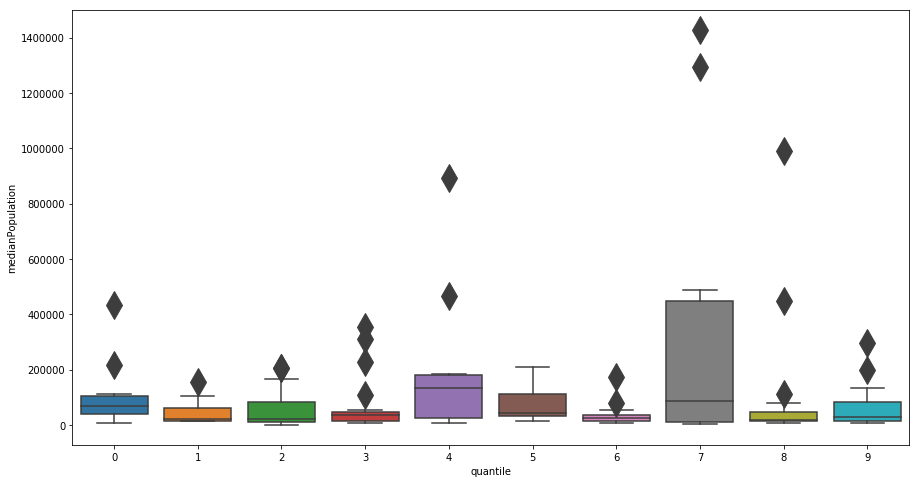

In [121]:
plt.figure(figsize=(15,8))
sns.boxplot(x = "quantile" , y = abs(y_test-0), data = predictions_NN,fliersize=20)

In [122]:
predictions_NN['error']=abs(predictions_NN.iloc[:,0]-predictions_NN['y_test'])
predictions_NN.dtypes

0            float32
y_test       float32
quantile    category
county      category
error        float32
dtype: object

<Figure size 1080x576 with 0 Axes>

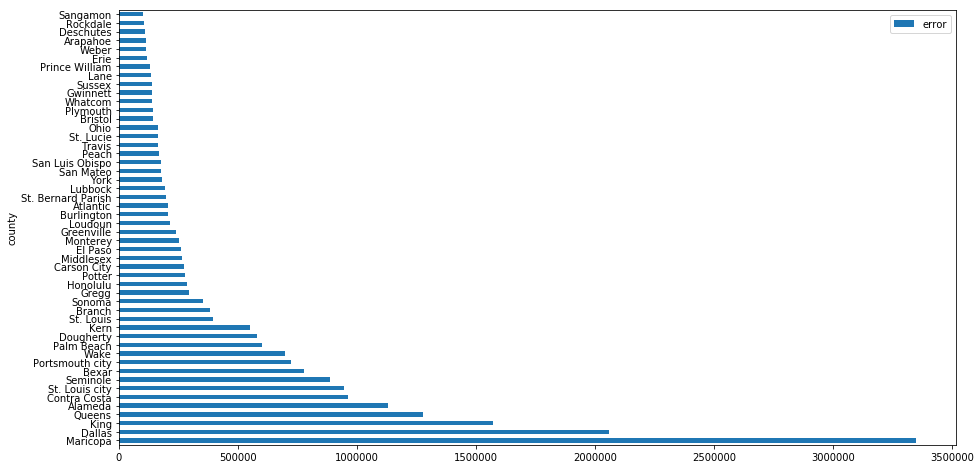

In [123]:
plt.figure(figsize=(15,8))
Counties = predictions_NN[['county', 'error']].groupby(['county'], as_index=False).mean().sort_values(by='error')
top_50_county = Counties.nlargest(50, 'error')
top_50_county.plot.barh(x='county', y='error', figsize =(15,8),rot=0)

In [0]:
from sklearn.model_selection import KFold

Cresting  subplots for train , Validation and test 

In [0]:

##Converting X_train, X_test, y_train and y_test as dataframes
X_train1 = pd.DataFrame({'PC1':X_train[:,0],'PC2':X_train[:,1],'PC3':X_train[:,2],'PC4':X_train[:,3],'PC5':X_train[:,4]})


In [0]:
X_test1 = pd.DataFrame(X_test, columns = ['PC1', 'PC2','PC3', 'PC4', 'PC5'])

In [0]:
y_train1 = pd.DataFrame(y_train, columns = ['medianPopulation'])

In [0]:
y_test1 = pd.DataFrame(y_test, columns = ['medianPopulation'])

In [0]:
# Creating function to create  scatterplot of predicted vs actual

def error_plots(y_actual, y_pred):

    plt.scatter(x = range(0, y_actual.size), y=y_actual, c = 'blue', label = 'Actual', alpha = 0.3)
    plt.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

    #plt.title('Actual and predicted')
    plt.xlabel('Observations')
    plt.ylabel('population')
    plt.legend();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


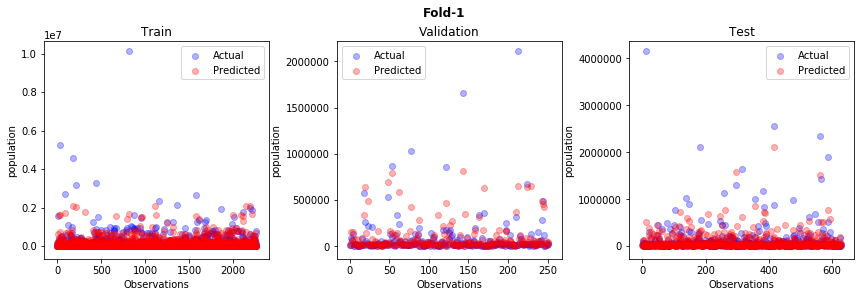

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


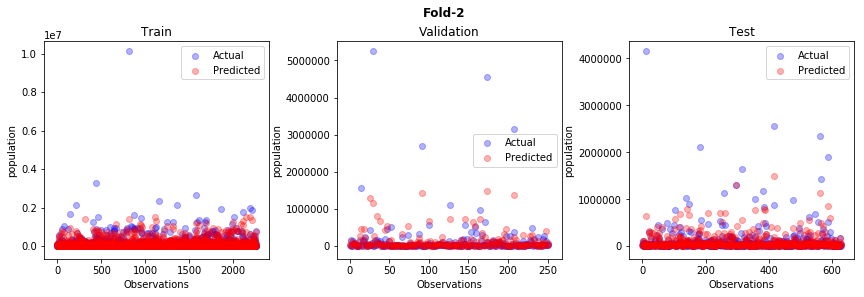

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


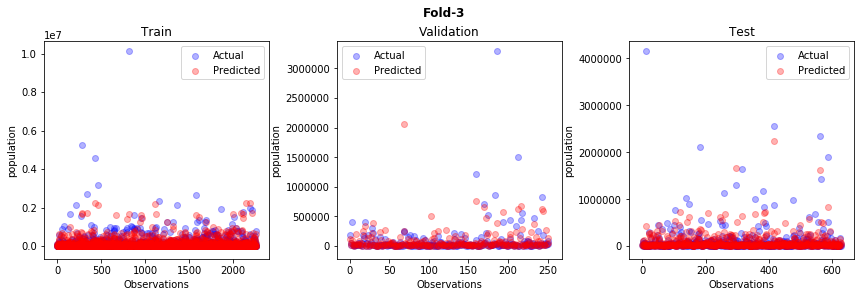

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


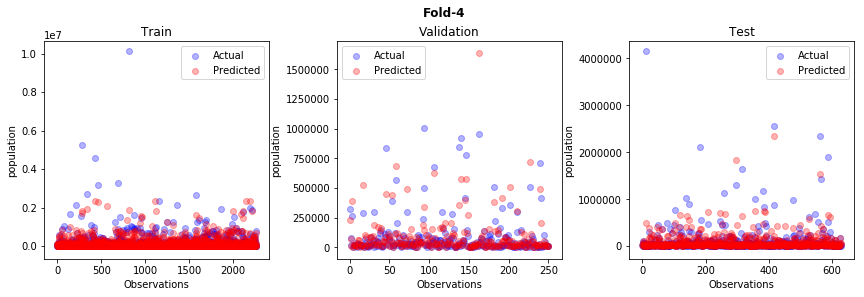

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


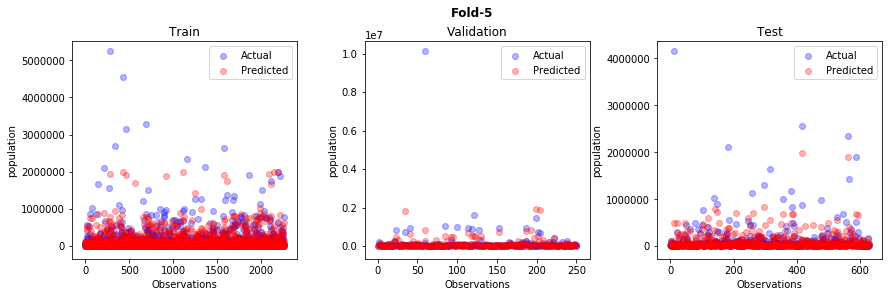

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


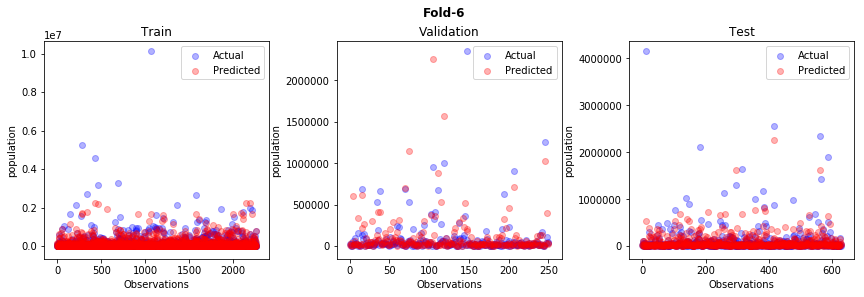

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


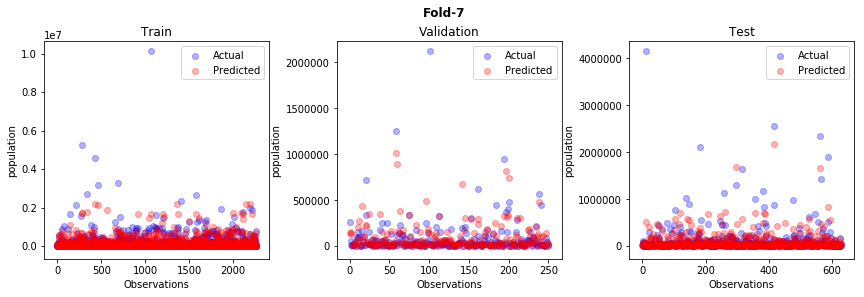

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


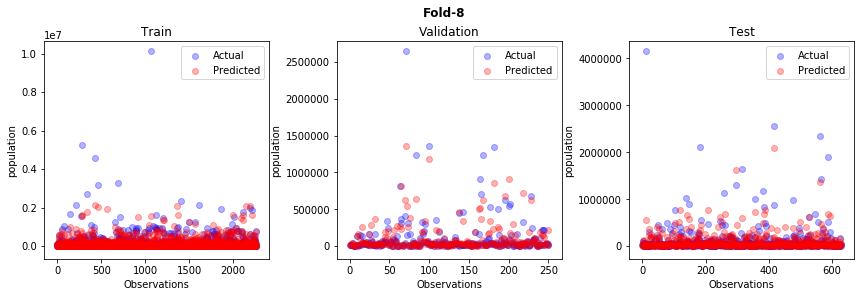

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


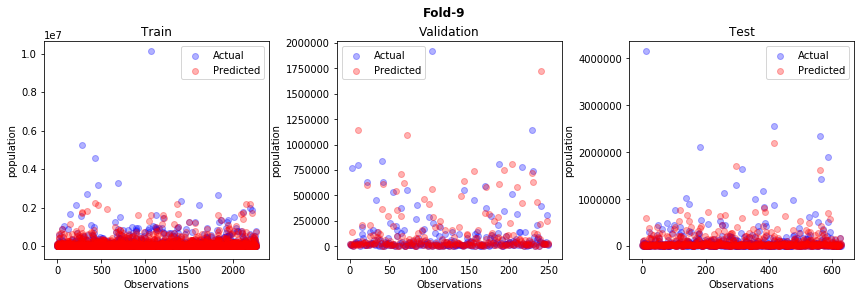

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


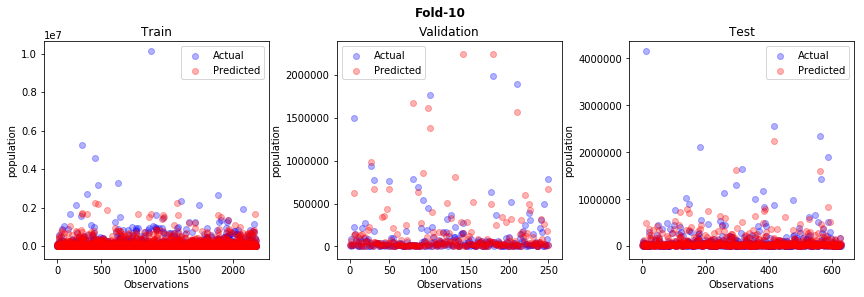

In [138]:
kf = KFold(n_splits=10, random_state=123)

train_mae, valid_mae, test_mae = [], [], []

from sklearn import metrics

fig = plt.figure()
for (train, test), i in zip(kf.split(X_train, y_train), range(10)):
    #fig = plt.figure()
    #plt.subplot(1,3,1)
    #plt.tight_layout()
    rf.fit(X_train1.iloc[train], y_train1.iloc[train])
    
    
    y_pred_train = rf.predict(X_train1.iloc[train])
    plt.title("fold" + str(i+1))
    plt.subplot(1,3,1)
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.3, hspace=None)
    plt.suptitle(("Fold-"+str(i+1)), fontsize=12,fontweight = 'bold', horizontalalignment = 'right', position= (1.1,1))
    plt.title("Train")
    error_plots(y_train1.iloc[train], y_pred_train)
    
    
    y_pred_valid = rf.predict(X_train1.iloc[test])
    plt.subplot(1,3,2)
    plt.subplots_adjust(left=None, bottom=None, right=2, top=None, wspace=0.3, hspace=None)
    plt.title("Validation")
    error_plots(y_train1.iloc[test], y_pred_valid)
    
    y_pred_test = rf.predict(X_test1)
    plt.subplot(1,3,3)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    plt.title("Test")
    error_plots(y_test1, y_pred_test)
    
    plt.show()

In [0]:
kf = KFold(n_splits=10, random_state=123)

train_mae, valid_mae, test_mae = [], [], []

from sklearn import metrics


for (train, test), i in zip(kf.split(X_train1, y_train1), range(10)):
    rf.fit(X_train1.iloc[train], y_train1.iloc[train])
    y_pred_train = rf.predict(X_train1.iloc[train])
    y_pred_valid = rf.predict(X_train1.iloc[test])
    y_pred_test = rf.predict(X_test1)
    
    train_mae.append(metrics.mean_absolute_error(y_train1.iloc[train], y_pred_train))
    valid_mae.append(metrics.mean_absolute_error(y_train1.iloc[test], y_pred_valid))
    test_mae.append(metrics.mean_absolute_error(y_test1, y_pred_test))


In [0]:
r_rf = pd.DataFrame(list(zip(train_mae, valid_mae, test_mae)), 
               columns =['train_error', 'validation_error', 'test_error'],
                 index=["fold-" + str(i) for i in range(1,11)] ) 

In [110]:
#table for mae(sd)
mae_nn_training=mae_NN[0]
mae_nn_test=mae_NN[1]
mae_training=mae[0]
mae_test=mae[1]
print(mae_nn_test)


13941.438300221867


In [111]:
model = [ 'Random Forest' ,'Neural Network']
col = ['MAE_sd_train','MAE_sd_Validation','MAE_sd_test']
values = [[mae_training,mae_test,0],[mae_nn_training,mae_nn_test,0]]
pd.DataFrame (index=model,data = values,columns= col)
#The test models are fitted after cross validation and results obtained in that scenario for both neural and random forest models was a single entity. Hence no standard deviation was added in the table below.

,MAE_sd_train,MAE_sd_Validation,MAE_sd_test
Random Forest,2036.422924,17040.993005,0
Neural Network,3958.974561,13941.438300,0
